In [1]:
%load_ext autoreload
%autoreload 2

import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

nside=32
orig_density_per_deg = 2500

In [48]:
#open randoms
randoms = S4Mock_io.read_desitargetrandoms(number=3)

In [49]:
#apply bgs mask to randoms and printed statement shows cuts 
randoms=geometry.bgs_mask_randoms(randoms)

BRIGHT 1 0.9906055352372272
CLUSTER 13 0.990477000068275
NOBS 0.977136350989897


In [50]:
target_pixel_density = geometry.targ_hpmap(randoms)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


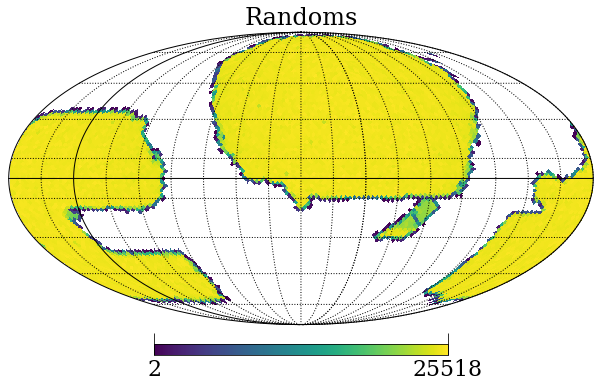

In [51]:
#mollview map of pixels
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

In [54]:
#Caluclate norm i.e corr_pixel_area
pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *3*orig_density_per_deg
filling_factor = target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor 

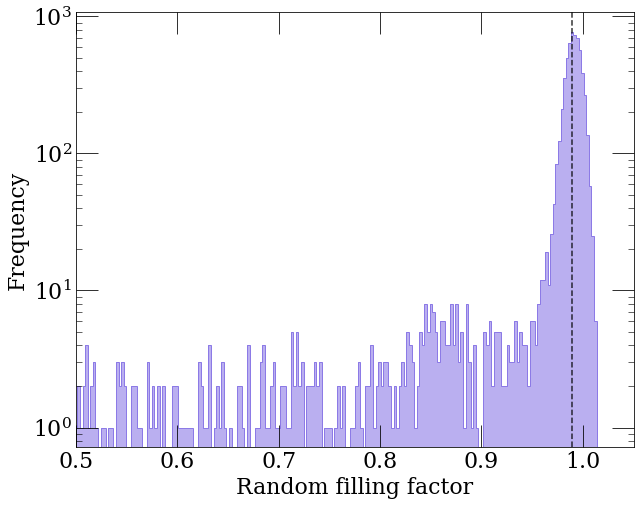

In [77]:
#histogram of filling factor: why does it have this shape?
#np.arange(0.0, 2.0, 0.025)

plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(filling_factor, bins=400, histtype='step', color = '#8c7ae6')
_ = plt.hist(filling_factor, bins=400, histtype='bar', color = '#8c7ae6',alpha =0.6)

filling_factor = filling_factor[~np.isnan(filling_factor)]
plt.axvline(x= np.percentile(filling_factor,50),linestyle='dashed',color='k',alpha=0.8)

plt.xlabel('Random filling factor')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.5,1.05)
plt.savefig('filling_factor.png')

In [ ]:
bright_main_survey_targs = S4Mock_io.read_mainsurvey_targets_bright()

Runtime of 0.127040 seconds after 0 pixels
Runtime of 4.740008 seconds after 20 pixels
Runtime of 8.497058 seconds after 40 pixels
Runtime of 12.630900 seconds after 60 pixels
Runtime of 16.541073 seconds after 80 pixels
Runtime of 21.485797 seconds after 100 pixels
Runtime of 28.451859 seconds after 120 pixels
Runtime of 31.919260 seconds after 140 pixels
Runtime of 35.853263 seconds after 160 pixels
Runtime of 40.560072 seconds after 180 pixels
Runtime of 45.794789 seconds after 200 pixels
Runtime of 49.762555 seconds after 220 pixels
Runtime of 52.229022 seconds after 240 pixels
Runtime of 56.168756 seconds after 260 pixels
Runtime of 60.729260 seconds after 280 pixels
Runtime of 68.237691 seconds after 300 pixels
Runtime of 73.560063 seconds after 320 pixels
Runtime of 78.360186 seconds after 340 pixels
Runtime of 82.001038 seconds after 360 pixels
Runtime of 85.034268 seconds after 380 pixels
Runtime of 88.814498 seconds after 400 pixels
Runtime of 94.467035 seconds after 420 pixe

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


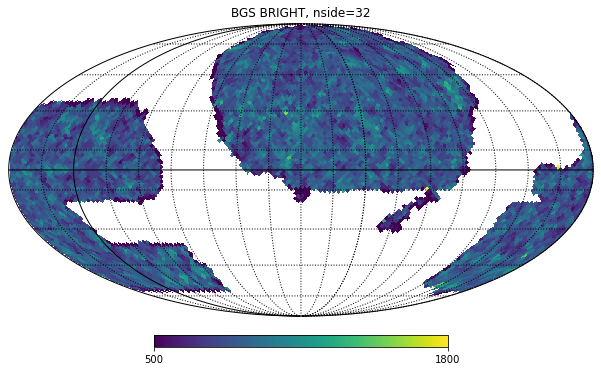

In [11]:
bright_target_pixel_density = geometry.targ_hpmap(bright_main_survey_targs,norm=corr_pixel_area)

#mollview map of pixels
#mollview map of pixels
hp.mollview(bright_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS BRIGHT, nside=32',min=500,max=1800)
hp.graticule(dpar=5, dmer=5) 

Text(0.5, 1.0, 'Two randoms')

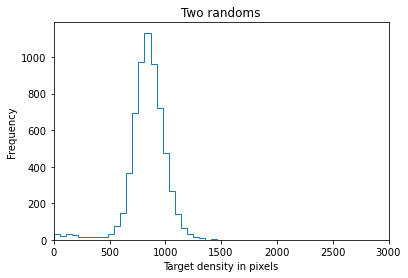

In [14]:
_ = plt.hist(bright_target_pixel_density, bins=100,histtype='step')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in pixels')
plt.xlim(0,3000)
plt.ylabel('Frequency')
plt.title('Two randoms')

In [15]:
faint_main_survey_targs = S4Mock_io.read_mainsurvey_targets_faint()

Runtime of 0.147418 seconds after 0 pixels
Runtime of 4.989435 seconds after 20 pixels
Runtime of 9.065265 seconds after 40 pixels
Runtime of 13.298806 seconds after 60 pixels
Runtime of 16.765121 seconds after 80 pixels
Runtime of 20.980346 seconds after 100 pixels
Runtime of 26.582892 seconds after 120 pixels
Runtime of 29.285722 seconds after 140 pixels
Runtime of 32.322679 seconds after 160 pixels
Runtime of 36.185681 seconds after 180 pixels
Runtime of 40.208222 seconds after 200 pixels
Runtime of 43.410997 seconds after 220 pixels
Runtime of 45.202886 seconds after 240 pixels
Runtime of 48.875947 seconds after 260 pixels
Runtime of 52.020958 seconds after 280 pixels
Runtime of 57.504000 seconds after 300 pixels
Runtime of 61.591220 seconds after 320 pixels
Runtime of 65.404736 seconds after 340 pixels
Runtime of 68.331826 seconds after 360 pixels
Runtime of 70.473346 seconds after 380 pixels
Runtime of 73.809855 seconds after 400 pixels
Runtime of 77.777343 seconds after 420 pixe

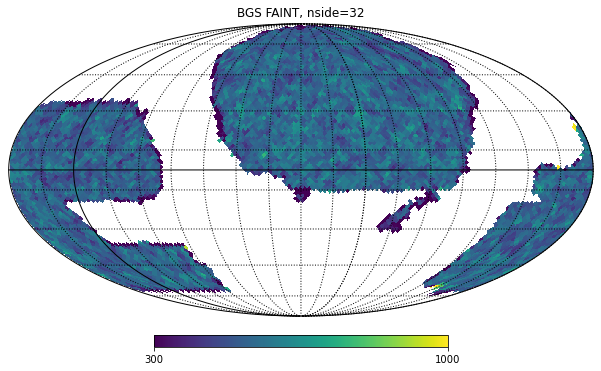

In [20]:
faint_target_pixel_density = geometry.targ_hpmap(faint_main_survey_targs,norm=corr_pixel_area)

#mollview map of pixels
#mollview map of pixels
hp.mollview(faint_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS FAINT, nside=32',min=300,max=1000)
hp.graticule(dpar=5, dmer=5) 

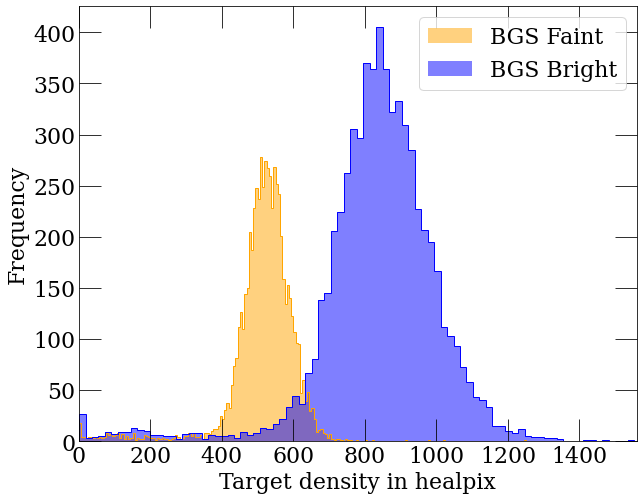

In [34]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density, bins=300,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density, bins=300,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density, bins=300,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density, bins=300,histtype='step',color='blue')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
plt.xlim(0,1560)
plt.ylabel('Frequency')
plt.legend()
plt.savefig('BGS_target_density.png',bbox_inches='tight')
